<a href="https://colab.research.google.com/github/MichalinaH/DataScienceStudies/blob/main/EWD/EWD_heart_desease_LogisticRegression_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zostały zrealizowane wszystkie punkty z zadania 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Wgranie zbioru "heart-disease"

In [ ]:
df = pd.read_csv("heart-disease.data") 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Faza 3: Eksploracja 



Braki w danych 

Sprawdzenie czy są wartości null

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Sprawdzenie czy są wartości NaN

In [ ]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Wypisanie wszystkich wartości z df w celu zweryfikowania ich poprawności 

In [ ]:
for col in df.columns:
  print(col)
  print(np.sort(pd.unique(df[col])))

age
[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
sex
[0 1]
cp
[0 1 2 3]
trestbps
[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]
chol
[126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318 319 321 322 325 326 327 330 335 340 341 342
 353 354 360 394 407 409 417 564]
fbs
[0 1]
reste

Propozycje klas
gdzie:
0 = "no disease"
1 = "disease"

In [ ]:
classes = ["0", "1"]

# Faza 4: przetwarzanie danych 

Podział na dane treningowe i testowe 

In [ ]:
#podział na dane i atrybut decyzyjny
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#wygenerowanie losowej permutacji
rng = np.random.RandomState(13)
permutation = list(range(len(df)))
rng.shuffle(permutation)

#wielkość zbioru testowego
testSize = 50

#podział na dane treningowe i testowe 
Xtrain = X.iloc[permutation[:-testSize]]
ytrain = y.iloc[permutation[:-testSize]]

Xtest = X.iloc[permutation[-testSize:]]
ytest = y.iloc[permutation[-testSize:]]


Sprawdzenie rozkładu klas train w celu dobrania wartości do losowania permutacji

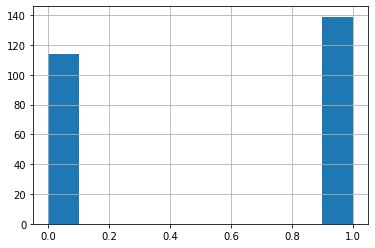

In [ ]:
ytrain.hist()

Sprawdzenie rozkładu klas test

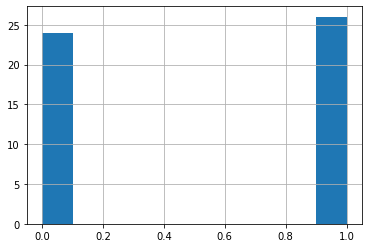

In [ ]:
ytest.hist()

regresja logistyczna

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain,ytrain)

ypred = log_reg.predict(Xtest)
ypred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0])

macierz omyłek dla regresji logistycznej 

In [ ]:
conf_mat = confusion_matrix(ytest,ypred)
conf_mat

array([[20,  4],
       [ 3, 23]])

ewaluacja regresji logistycznej

In [ ]:
accuracy = accuracy_score(ytest,ypred)
accuracy

0.86

Model knn dla k=28 (wartość k zostałą dobrana po analizie wykresu znajdującego się poniżej)

In [ ]:
model = knn(28)
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=28)

In [ ]:
predicted = model.predict(Xtest)
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1])

Ocen dokladnosc klasyfikatora


In [ ]:
metrics.accuracy_score(ytest, predicted)

0.78

Wykres zależności accuracy od k, dzięki temu możemy wybrać k dla którego model ma najlepsze wyniki 

[0.66, 0.6, 0.74, 0.62, 0.66, 0.66, 0.72, 0.68, 0.68, 0.64, 0.66, 0.7, 0.72, 0.72, 0.68, 0.7, 0.7, 0.72, 0.72, 0.72, 0.7, 0.74, 0.74, 0.74, 0.76, 0.74, 0.74, 0.78, 0.7, 0.74, 0.68, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.74, 0.76, 0.72, 0.72, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.72, 0.72, 0.68, 0.72, 0.72, 0.76, 0.76, 0.76, 0.74, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.74, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68]


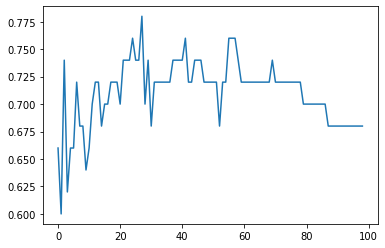

In [ ]:
values = []
for k in range(1,100):
    modelk = knn(k)
    modelk.fit(Xtrain, ytrain)
    predicted = modelk.predict(Xtest)
    values.append(metrics.accuracy_score(ytest, predicted))
print(values)

plt.plot(values)

Regresja logistyczna wypada lepiej nie zależnei od wartości k w modelu knn

# Skalowanie atryburów 

In [ ]:
scaler = StandardScaler().fit(Xtrain)
XtrainScaled = scaler.transform(Xtrain)

dfts = pd.DataFrame(XtrainScaled)
print(dfts.mean())
print(dfts.std())

0    -2.808469e-16
1    -1.018070e-16
2     1.404235e-17
3     7.021173e-18
4     9.478584e-17
5    -6.670115e-17
6     4.914821e-17
7    -5.950444e-16
8     2.457411e-17
9     3.686116e-17
10    1.298917e-16
11    2.457411e-17
12   -2.808469e-17
dtype: float64
0     1.001982
1     1.001982
2     1.001982
3     1.001982
4     1.001982
5     1.001982
6     1.001982
7     1.001982
8     1.001982
9     1.001982
10    1.001982
11    1.001982
12    1.001982
dtype: float64


Atrybuty znormalizowane

skalowanie danych testowych 

In [ ]:
XtestScaled = scaler.transform(Xtest)

dftstest = pd.DataFrame(XtestScaled)
print(dftstest.mean())
print(dftstest.std())

0    -0.081297
1    -0.008160
2    -0.124746
3    -0.124718
4     0.371444
5    -0.284900
6     0.252656
7    -0.128887
8     0.241883
9    -0.048364
10    0.001266
11   -0.033604
12    0.052019
dtype: float64
0     0.895809
1     1.013372
2     1.022146
3     0.704166
4     1.306920
5     0.644735
6     0.913741
7     1.086821
8     1.079642
9     0.902144
10    0.914972
11    0.846743
12    1.027743
dtype: float64


Statystyki zdecydowanie mniej idealne, jako że zostały przeskalowane na podstawie train 

regresja logistyczna i macierz omyłek dla przeskalowanych danych

In [ ]:
log_reg.fit(XtrainScaled,ytrain)

ypredScaled = log_reg.predict(XtestScaled)

conf_mat = confusion_matrix(ytest,ypred)
conf_mat

array([[20,  4],
       [ 3, 23]])

dokładność dla regresji liniowej dla przeskalowanych danych 

In [ ]:
accuracy = accuracy_score(ytest,ypredScaled)
accuracy

0.86

wykres zależności accuracy od k dla przeskalowanych danych 

[0.78, 0.76, 0.84, 0.8, 0.76, 0.8, 0.8, 0.82, 0.82, 0.8, 0.82, 0.8, 0.82, 0.82, 0.84, 0.84, 0.86, 0.82, 0.84, 0.82, 0.82, 0.82, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.88, 0.86, 0.88, 0.86, 0.86, 0.86, 0.88, 0.86, 0.86, 0.86, 0.86, 0.84, 0.84, 0.86, 0.84, 0.86, 0.84, 0.86, 0.84, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.86, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.82, 0.84, 0.82, 0.84, 0.84, 0.84, 0.8, 0.8, 0.8, 0.8, 0.8]


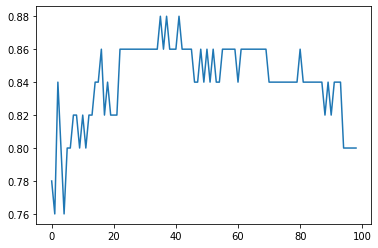

In [ ]:
valuesScaled = []
for k in range(1,100):
    modelk = knn(k)
    modelk.fit(XtrainScaled, ytrain)
    predictedScaled = modelk.predict(XtestScaled)
    valuesScaled.append(metrics.accuracy_score(ytest, predictedScaled))
print(valuesScaled)

plt.plot(valuesScaled)

Prz przeskalowanych danych dokładność regresji logistycznej (0.86) nie jest już tak dużó lepsza od modelu knn jak przy danych nie przeskalowanych. Przy przeskalowanych dokładność modelu knn dochodzi do 0.88

Porównanie modelu knn dla danych przeskalowanych i oryginalnych 

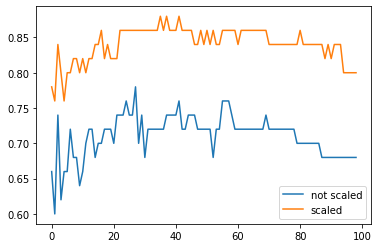

In [ ]:
plt.plot(values)
plt.plot(valuesScaled)
plt.legend(["not scaled", "scaled"]);

Model ma większą dokładność przy danych skalowanych średnio o ponad 10 punktów procentowych